![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [8]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [9]:
data=pd.read_csv('kc_house_data.csv')
selected_columns = [
    'id', 'price', 'bedrooms', 'bathrooms', 
    'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
    'condition', 'grade', 'yr_built']

data= data[selected_columns]
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [10]:
data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [11]:
# Handle missing values in 'waterfront' column
data['waterfront'].fillna(0, inplace=True)
data['waterfront'] = data['waterfront'].astype(int)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

Model 1: Using Statistical methods to check the statistical sugnificance of having a waterfront to property price

Mean price with waterfront: $1717214.73
Mean price without waterfront: $532286.22


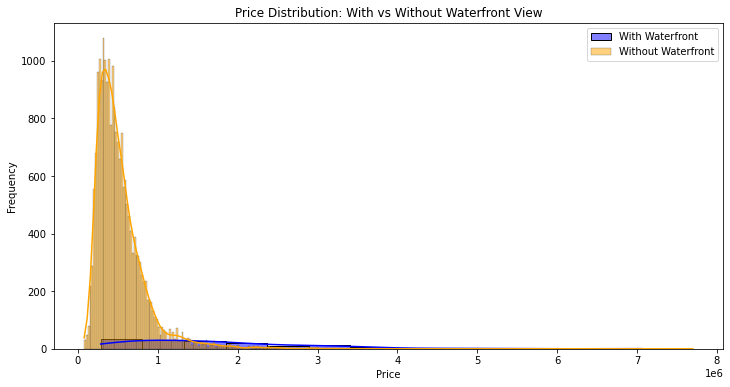

T-test results: t-statistic = 12.50, p-value = 0.000
There is a statistically significant difference in prices between properties with and without waterfront views.


In [12]:
# Separate data based on waterfront view
with_waterfront = data[data['waterfront'] == 1]
without_waterfront = data[data['waterfront'] == 0]

# Compute summary statistics
mean_price_with = with_waterfront['price'].mean()
mean_price_without = without_waterfront['price'].mean()
print(f"Mean price with waterfront: ${mean_price_with:.2f}")
print(f"Mean price without waterfront: ${mean_price_without:.2f}")

# Visualize price distributions
plt.figure(figsize=(12, 6))
sns.histplot(with_waterfront['price'], color='blue', label='With Waterfront', kde=True)
sns.histplot(without_waterfront['price'], color='orange', label='Without Waterfront', kde=True)
plt.title('Price Distribution: With vs Without Waterfront View')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Statistical Test: T-Test to check price difference
t_stat, p_val = stats.ttest_ind(with_waterfront['price'], without_waterfront['price'], equal_var=False)
print(f"T-test results: t-statistic = {t_stat:.2f}, p-value = {p_val:.3f}")

if p_val < 0.05:
    print("There is a statistically significant difference in prices between properties with and without waterfront views.")
else:
    print("There is no statistically significant difference in prices between properties with and without waterfront views.")


Model 2: Using OlS model to predict property price using the selected columns in the dataframe

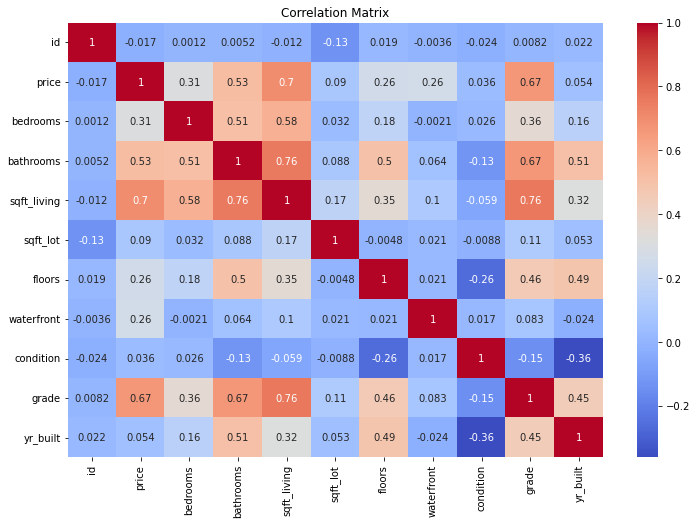

In [13]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

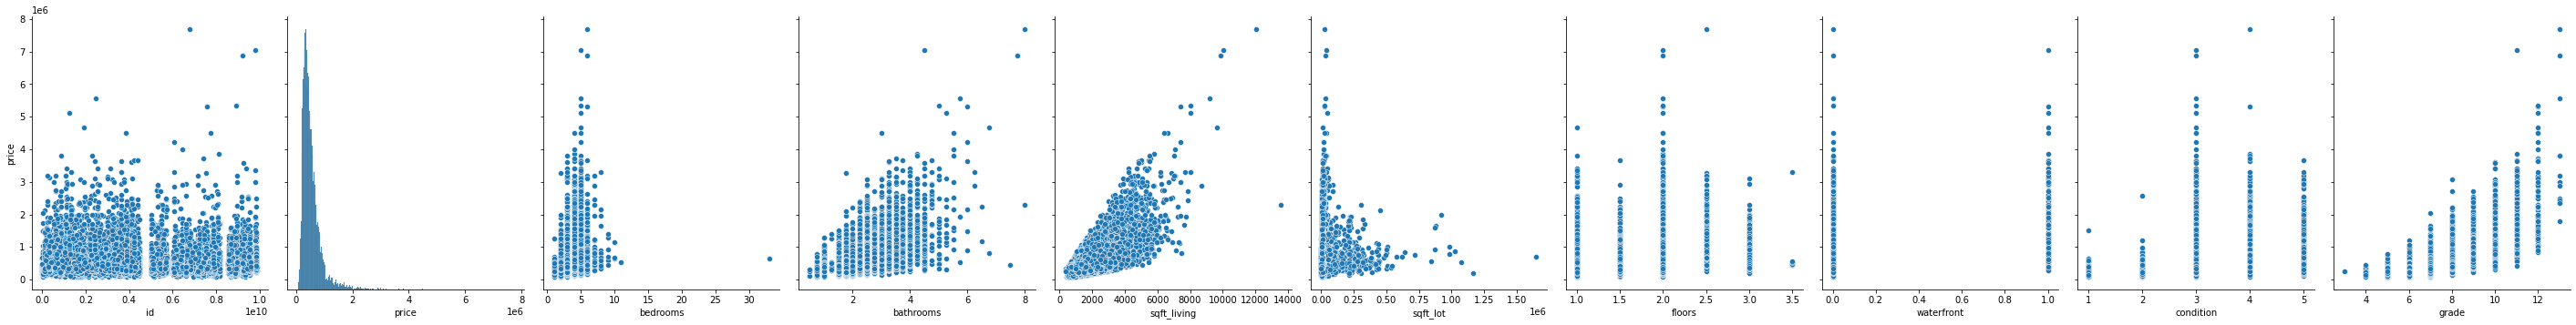

In [14]:
# Verify that the selected columns are in the DataFrame
missing_columns = [col for col in selected_columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns in DataFrame: {missing_columns}")
else:    # Pairplot to visualize relationships between selected features and price
    sns.pairplot(data[selected_columns], y_vars='price', x_vars=selected_columns[:-1], height=5, aspect=0.8)
    plt.show()

In [15]:
import statsmodels.api as sm

# Select relevant features
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']]
y = data['price']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4370.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:39:27   Log-Likelihood:            -2.9619e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21587   BIC:                         5.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.695e+06    1.3e+05     51.593      

Model 3: Using machine learning 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


Mean Squared Error: 51269681939.83
R-squared: 0.64
       Feature    Coefficient
0        const       0.000000
1     bedrooms  -40757.552170
2    bathrooms   48175.001315
3  sqft_living     172.788128
4     sqft_lot      -0.276556
5       floors   20921.830844
6   waterfront  808841.633674
7    condition   18589.497058
8        grade  130776.530083
9     yr_built   -3814.216901


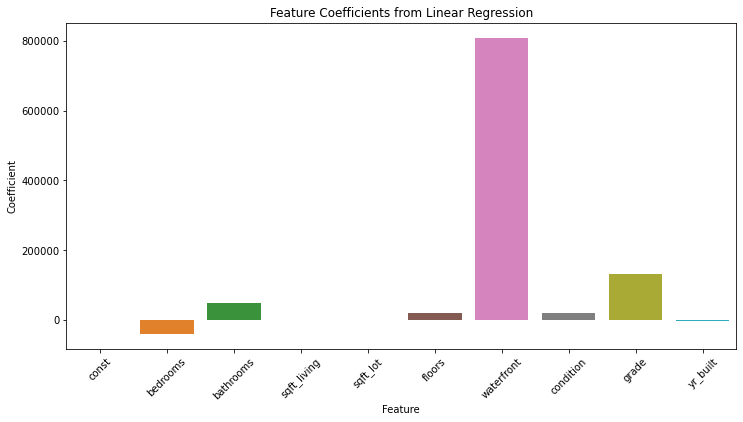

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Get the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Plotting the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Coefficient', data=coefficients)
plt.title('Feature Coefficients from Linear Regression')
plt.xticks(rotation=45)
plt.show()



In [18]:
# read data without the target variable
data_pred = data.iloc[:,0:9]
data_pred

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3
...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,3


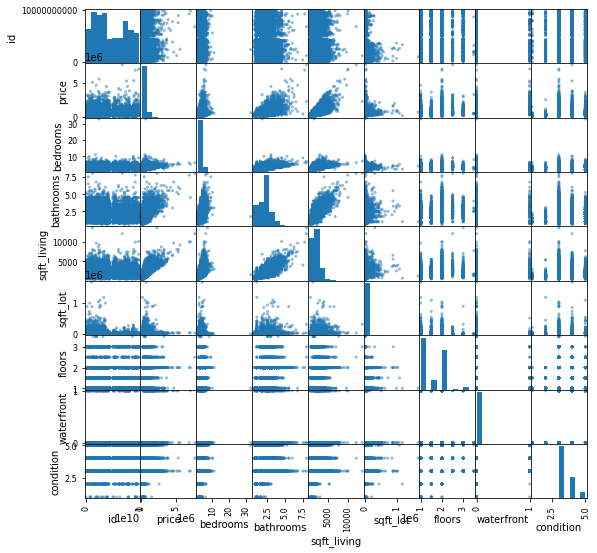

In [19]:
#plot to sow how the prdictor varibles relate to each other
pd.plotting.scatter_matrix(data_pred,figsize=[9,9]);
plt.show()

In [20]:
# detailed describtion of the relationship of predictor variables
data_pred.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.023803
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000


In [21]:
abs(data_pred.corr()) > 0.50

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition
id,True,False,False,False,False,False,False,False,False
price,False,True,False,True,True,False,False,False,False
bedrooms,False,False,True,True,True,False,False,False,False
bathrooms,False,True,True,True,True,False,True,False,False
sqft_living,False,True,True,True,True,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False
floors,False,False,False,True,False,False,True,False,False
waterfront,False,False,False,False,False,False,False,True,False
condition,False,False,False,False,False,False,False,False,True


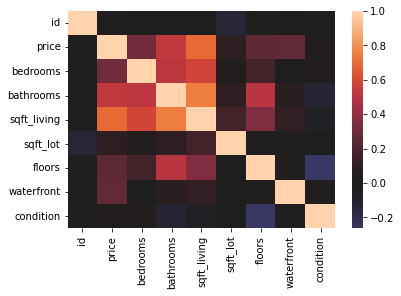

In [22]:
sns.heatmap(data_pred.corr(), center=0);

we can use a stack and a subset to retuen only high correlation in respect to our dataset

In [23]:
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [24]:
df[(df.cc>.50) & (df.cc <1)]

,cc
pairs,
"(sqft_living, bathrooms)",0.755758
"(sqft_living, price)",0.701917
"(bedrooms, sqft_living)",0.578212
"(bathrooms, price)",0.525906
"(bedrooms, bathrooms)",0.514508
"(bathrooms, floors)",0.502582


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***